In [1]:
import pandas as pd
import seaborn as sns

reading dataset


In [2]:
df=pd.read_csv("car_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


checking null value

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

updating data frame

In [8]:
def upd_year(num):
    return 2023-num

df['Year']=df['Year'].apply(upd_year)

In [13]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


converting categorical variable into numerical variable

In [19]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


<Axes: >

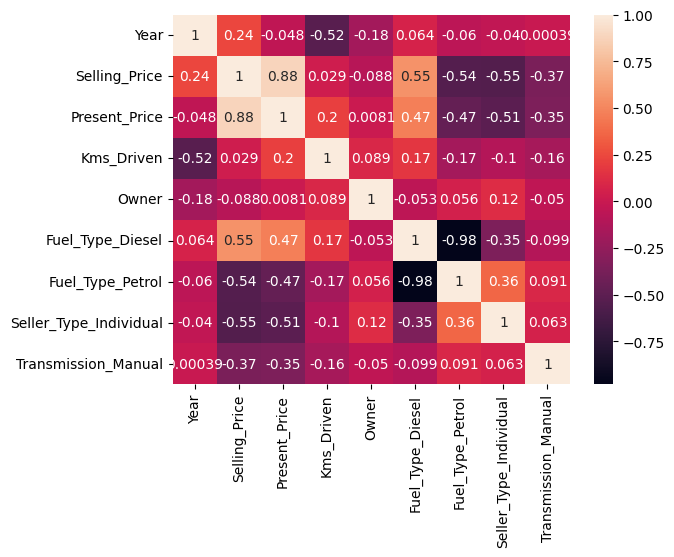

In [23]:
sns.heatmap(df.corr(),annot=True)

independent and dependent variable

In [24]:
x=df.drop(columns=["Selling_Price"])
y=df["Selling_Price"]

Scalling data set

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()

In [28]:
x_scaled=scaler.fit_transform(x)

In [31]:
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.128897,-0.236215,-0.256224,-0.174501,-0.498962,0.509327,-0.737285,0.39148
1,-0.217514,0.221505,0.155911,-0.174501,2.004162,-1.963374,-0.737285,0.39148
2,1.168129,0.257427,-0.773969,-0.174501,-0.498962,0.509327,-0.737285,0.39148
3,-0.910335,-0.403079,-0.817758,-0.174501,-0.498962,0.509327,-0.737285,0.39148
4,0.128897,-0.087890,0.141743,-0.174501,2.004162,-1.963374,-0.737285,0.39148


train test split

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

Training

In [36]:
from sklearn.linear_model import LinearRegression

In [39]:
linear_model=LinearRegression()
linear_model.fit(x_train,Y_train)

LinearRegression()

In [40]:
linear_model.score(x_train,Y_train)

0.8864821522466643

prediction

In [42]:
y_pred=linear_model.predict(X_test)
y_pred

array([ 7.33471054,  1.92293142,  0.57670519,  3.44361854,  1.03797828,
       16.97827007,  0.89979793,  6.35686952,  1.79968767,  1.84373156,
        0.6251993 ,  7.58155357, -1.04812187,  1.26752329,  1.1241073 ,
        1.58490517,  4.76658792,  0.08949879,  3.90447914,  0.08138053,
        5.56288854,  7.47938789,  0.46963565, 10.62281321,  7.12918164,
        1.43659703, -2.57211382,  2.94515174,  4.19812691,  4.5185514 ,
        1.97346931,  5.76916151,  1.53101922,  3.31429407,  2.77164534,
        4.87456943,  2.39454792,  3.04260506,  4.14543275, -0.80102083,
        4.44538082, 10.02716073,  0.89329902,  7.41752697,  2.19409233,
        9.15414108,  0.29568581,  3.90645348,  7.95935709,  9.86462669,
       15.04033995,  1.90878596,  5.0003494 ,  3.39317439,  2.09658096,
        7.36409008,  4.23384293, -0.94609637,  3.92518972,  4.10874823,
        6.77262568])

mean square error r2 score

In [43]:
from sklearn.metrics import mean_squared_error,r2_score

In [44]:
mean_squared_error(Y_test,y_pred)

2.7434884279315495

In [45]:
r2_score(Y_test,y_pred)

0.8410831901201298

<Axes: xlabel='Selling_Price'>

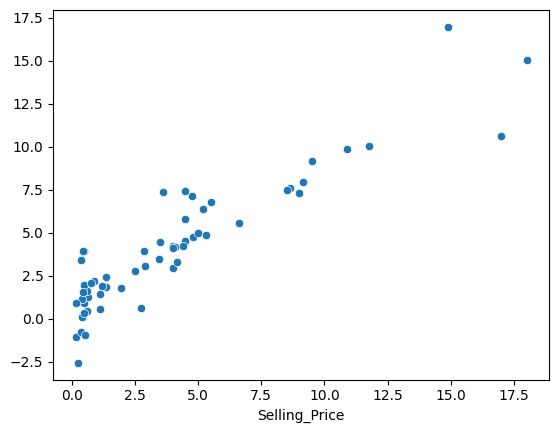

In [48]:
sns.scatterplot(x=Y_test,y=y_pred)